### Problems with Deep Neural Nets:
1. Vanishing gradients and exploding gradients problem makes the lower layers very hard to train.
2. Large networks makes the training extremely slow.
3. There will be large number of hyper parameters to tune and these would severly risk overfitting the training set.

### Vanishing/Exploding Gradients Problems
1. The backpropagation algorithm works by going from the output layer to the input layer, propagating the error gradient on the way.
2. Once the algorithm has computed the gradient of the cost function with regards to each parameter in the network, it uses these gradients to update each parameter with a Gradient Descent step.
3. Sometimes, gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leaves the lower level layers connection weights virtually unchanged, and training never converges to a good solution. This is called *Vanishing Gradients problem*.
4. Sometimes, the opposite can happen: the gradients can grow bigger and bigger, so many layers get insanely large weight updates and the algorithm diverges. This is calle *Exploding Gradients problem*.
5. Generally, DNN suffer from unstable gradients; different layers may learn at widely different speeds.

### Reasons for this behavior:
1. Usage of logistic sigmoid activation function.
2. Weight initilization techniques such as random initilization using a mean of 0 and SD of 1.
3. Because of the combination of the above two reasons, the variance of the outputs of each layer is much greater than the variance of the inputs. Going forward, the variance keeps increasing after each layer until the activation fucntion saturates at the top layers. 

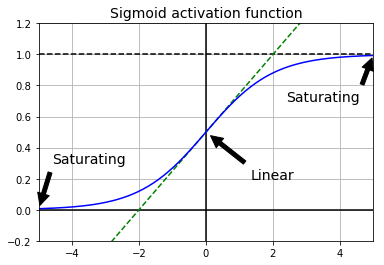

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

def logit(z):
    return(1/(1+(np.exp(-z))))

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b')
plt.axis([-5, 5, -0.2, 1.2])
plt.grid()
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.title("Sigmoid activation function", fontsize=14)
plt.show()

At higher positive and negative inputs, the function saturates at 0 or 1 and the gradient is 0 there. Thus when the backpropagation kicks in, there is virutually no gradient to propogate back through the network, and what little gradient exists keeps getting diluted as backpropagation progresses down through the top layers, so there is really nothing left for the lower layers.
### Hyperbolic Tanget function

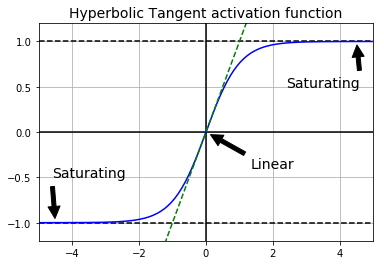

In [2]:
def tan_h(z):
    return np.tanh(z)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [1.2, -1.2], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot(z, tan_h(z), 'b')
plt.plot([-5, 5], [-5, 5], 'g--')
plt.axis([-5, 5, -1.2, 1.2])
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.5), xy=(4.5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5,-0.5), xy=(-4.5, -1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, -0.4), xy=(0, 0), arrowprops=props, fontsize=14, ha="center")
plt.title("Hyperbolic Tangent activation function", fontsize=14)
plt.show()

### Xavier and He Initialization:

1. To avoid vanishing/exploding gradient problems, Glorot and Bengio proposed that we need the variance of the outputs of each layer to be equal variance before and after flowing through a layer in the reverse direction.
2. Xavier initilization considers both the number of input and output connections whose layer weights are being initialized.
3. He initilization considers only the number of input connections whose layer weights are being initialized.

### ReLU Activation Function:
1. ReLU outputs its input value if it is more than zero and outputs zero for all other values.
2. It doesn't saturate for positive values.
3. It's gradient is faster to compute.

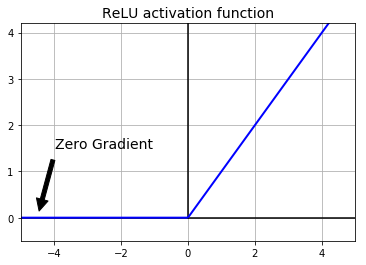

In [3]:
def relu(z):
    return np.maximum(0,z)

plt.plot([-5,5],[0,0],"k-")
plt.plot([0,0],[0,5], "k-")
plt.plot(z, relu(z), "b-", linewidth=2)
plt.annotate('Zero Gradient', xytext=(-2.5, 1.5), xy=(-4.5, 0), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

### Problems with ReLU:
1. It suffers from a problem known as the dying ReLu: during training some nerons effectively die, meaning our network's neurons are dead, especially if you used a large learning rate.
2. During training, if a neuron's weights get updated such that the weighted sum of the neuron's inputs is negative, it will start outputting 0. When this happens, the neuron is unlikely to come back to life since the gradient of the ReLU function is 0 when its input is negative.

### Leaky ReLU:

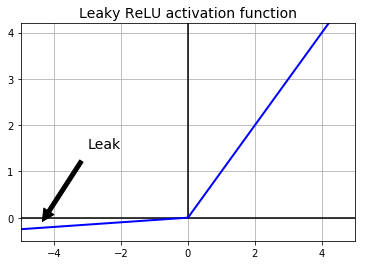

In [4]:
def leaky_relu(z, alpha):
    return np.maximum(alpha*z,z)

plt.plot([-5,5],[0,0],"k-")
plt.plot([0,0],[0,5], "k-")
plt.plot(z, leaky_relu(z,0.05), "b-", linewidth=2)
plt.annotate('Leak', xytext=(-2.5, 1.5), xy=(-4.5, -0.25), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

1. Alpha parameter calculates how much the leak should be.
2. That small leak will make sure that the function never dies; they can go into a logn coma, but they have a chance to eventually wake up. Performs better than normal ReLU in most situations.
3. *Parametric Leaky ReLU* where alpha is authorized to be learned during training (it becomes a parameter that can be modified by backpropagation instead of being a hyperparameter). Perfroms better with large image datasets but overfits on smaller datasets.

### Exponential Linear Unit (ELU):

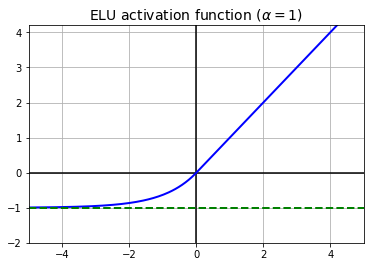

In [5]:
def elu(z, alpha):
    return np.where(z < 0, alpha*(np.exp(z)-1), z)

plt.plot([-5,5],[0,0],"k-")
plt.plot([0,0],[-2,5], "k-")
plt.plot(z, elu(z,1), "b-", linewidth=2)
plt.plot([-5,5],[-1,-1], "g--", linewidth=2)
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2, 4.2])
plt.show()

### Advantages of ELU:
1. Vanishing gradient problem is alleviated for the z<0, the average output is closer to zero. The hyper parameter alpha defines the value that the ELU function approaches when z is a large negative number.
2. For z<0, the gradient is not zero, which avoids dying units issues.
3. The function is smooth everywhere including around z=0, which speed up Gradient Descent, since it does not bounce as much left and right of z=0.


### Drawbacks of ELU:
1. Slower due to compute when compared to other ReLU variants.
2. It converges faster than other functions during training but again during testing ELU network will be slower than a ReLU network.

### Actvating ELU function
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name="hidden1")

### Scaled Exponential Linear Unit (SELU):

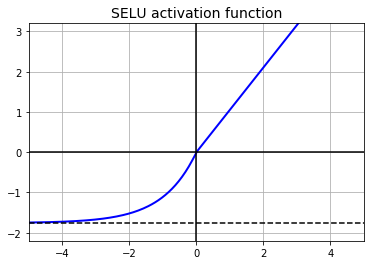

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [13]:
#Implementing SELU on MNIST dataset
tf.reset_default_graph()

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("E:/GitHub Main/Python-Handson-Projects/datasets/mnist")

# X_train = mnist.train.images
# X_test = mnist.test.images
# y_train = mnist.train.labels.astype("int")
# y_test = mnist.test.labels.astype("int")

def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z>=0.0, z, alpha*tf.nn.elu(z))

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("DNN"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=selu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=selu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
n_epochs = 40
batch_size = 50

means = mnist.train.images.mean(axis=0, keepdims=True)
stds = mnist.train.images.std(axis=0, keepdims=True) + 1e-10

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch_scaled = (X_batch - means) / stds
            sess.run(training_op, feed_dict={X: X_batch_scaled, y: y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch_scaled, y: y_batch})
            X_val_scaled = (mnist.validation.images - means) / stds
            acc_test = accuracy.eval(feed_dict={X: X_val_scaled, y: mnist.validation.labels})
            print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_test)

0 Batch accuracy: 0.82 Validation accuracy: 0.9232
5 Batch accuracy: 0.98 Validation accuracy: 0.9542
10 Batch accuracy: 0.98 Validation accuracy: 0.9598
15 Batch accuracy: 0.96 Validation accuracy: 0.9632
20 Batch accuracy: 1.0 Validation accuracy: 0.9654
25 Batch accuracy: 1.0 Validation accuracy: 0.9676
30 Batch accuracy: 1.0 Validation accuracy: 0.968
35 Batch accuracy: 1.0 Validation accuracy: 0.9682


### Batch Normalization
1. To some extent ELU (other activation functions) and Xavier and He intilization techniques reduce the vanishing/exploding gradient problems but they still may arise during the training.
2. Batch Normalization consistsof adding an opration in the model just before the activation function of each layer.

### Algorithm Steps
1. Find the mean for each feature in each batch
2. Find the SD for each feature in each batch
3. Calculate the (x-xmean)/xsd
4. Multiply with a scaling factor and add this to shifting factor

### Advantages and Drawbacks of Batch Normalization:
1. Vanishing gradients problem was much reduced with BN that they could use saturating activation functions such as tanh and logit function.
2. Networks were less sensitive to weight initialization problems.
3. Higher learning rates can be used which speeds up the training rate.
4. Adds complexity to the model
5. Run time may increase

#### Implementing Batch Normalization with TensorFlow:

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from functools import partial

tf.reset_default_graph()

mnist = input_data.read_data_sets("E:/GitHub Main/Python-Handson-Projects/datasets/mnist")

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
batch_norm_momentum = 0.9

X = tf.placeholder(dtype=tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(dtype=tf.int64, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name="training")

with tf.name_scope("DNN"):
    he_init = tf.contrib.layers.variance_scaling_initializer()
    
    my_batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training = training,
            momentum = batch_norm_momentum)
    
    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)
    
    hidden1 = my_dense_layer(X, n_inputs, name = "hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden1, name = "hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name = "outputs")
    logits = my_batch_norm_layer(logits_before_bn)
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 20
batch_size = 200

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops],
                     feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

Extracting E:/GitHub Main/Python-Handson-Projects/datasets/mnist\train-images-idx3-ubyte.gz
Extracting E:/GitHub Main/Python-Handson-Projects/datasets/mnist\train-labels-idx1-ubyte.gz
Extracting E:/GitHub Main/Python-Handson-Projects/datasets/mnist\t10k-images-idx3-ubyte.gz
Extracting E:/GitHub Main/Python-Handson-Projects/datasets/mnist\t10k-labels-idx1-ubyte.gz
0 Test accuracy: 0.8914
1 Test accuracy: 0.9128
2 Test accuracy: 0.9245
3 Test accuracy: 0.9314
4 Test accuracy: 0.939
5 Test accuracy: 0.944
6 Test accuracy: 0.9497
7 Test accuracy: 0.9528
8 Test accuracy: 0.9558
9 Test accuracy: 0.9594
10 Test accuracy: 0.9603
11 Test accuracy: 0.9615
12 Test accuracy: 0.9638
13 Test accuracy: 0.9642
14 Test accuracy: 0.9648
15 Test accuracy: 0.9654
16 Test accuracy: 0.9677
17 Test accuracy: 0.9695
18 Test accuracy: 0.9697
19 Test accuracy: 0.9694


### Gradient Clipping:
1. Gradient clipping technique is used to lessen the exploding gradients problem. 
2. Here, we clip the gradient between a threshold so that during backpropagation gradient will not exceed the threshold defined.
3. Mostly useful for RNN
4. In Tensorflow, the optimizer's minimize() function takes care of both computing the gradients and applying them.
5. To clip gradient, we first need to compute the gradient using optimizer.compute_gardients function and then use tf.clip_by_var and then use apply optimizer.apply_gradients

In [ ]:
threshold = 1.0
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var) for grad, var in grads_and_vars]
training_op = optimizer.apply_gradients(capped_gvs)

# Reusing Pretrained Models
Yet to complete

## Fast Optimizers
1. Till now we learned different techniques to speed up the process of training the Neural Networks. Some of them are: <br /> I. Good intilization strategy for connection weights. <br />II. Using good activation functions. <br /> III. Using Batch Normalization. <br />IV. Reusing pretrained networks. <br />V. Changing learning rates.
2. Can use other optimization techniques apart from Gradient Descent optimization. <br /> I. Momentum Optimization<br />II. Nesterov Accelerated Gradient <br /> III. AdaGrad <br /> IV. RMSProp<br /> V. Adam Optimization

### Momentum Optimization:
Gradient Descent updates the weights $\theta$ directly by subtracting the cost function $\mathrm{J}(\theta)$ with regards to the weights $\nabla_\theta \mathrm{J}(\theta)$ multiplied by the learning rate $\eta$. It doesn't care about the earlier gradients. If the local gradient is small, it moves very slowly.<br />
$$\theta\leftarrow\theta-\eta\nabla_\theta \mathrm{J}(\theta)$$
Momentum optimization cares about the previous gradients. At each iteration, it adds the local gradient to the momentum vector $\mathbf{m}$ and then updates the weights. $\beta$ is the hyperparamter which is called momentum, much be set between 0 (high friction) and 1 (no friction). A typical momentum value is 0.9.
$$1.\,\,\,\,\,\mathbf{m}\leftarrow\beta\mathbf{m}+\eta\nabla_\theta \mathrm{J}(\theta)$$
$$2.\,\,\,\,\,\theta\leftarrow\theta-\mathbf{m}$$
If $\beta$ is 0.9, Momentum Optimization, approaches the optimum solution 10 times faster than the Gradient Descent algorithm.
#### Advantages:
1. Faster than Normal Gradient Descent algorithm.
2. Can be used without scaling and takes normal time to come optimum solution unlike Gradient Descent algorithm which takes more time to find optimum solution.
3. Escapes local minima.<br /> 

#### Drawbacks:
1. Takes long time to find the extact global minima as the optimizer may overshoot a bit, then come back, overshoot again, and oscillate like this many time before stabilizing at the minimum. This can reduced by using good value friction hyper parameter. Good friction hyper parameter speeds up convergence.<br />
#### In Tensorflow
optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9)

### Nesterov Accelerated Gradient (NAG):
1. This is a variant of Momentum Optimization algorithm. It is always faster than vanilla momentum optimization.
2. *Nesterov Momentum Optimization* or *Nesterov Acclerated Gradient*, measures the gradient not at the local minima but slightly ahead in the direction of the momentum.
3. The only difference between *Momentum Optimization* and *NAG* is that the gradient is measured at $\theta+\beta\mathbf{m}$.<br />
**Algorithm:**
$$1.\,\,\,\,\,\mathbf{m}\leftarrow\beta\mathbf{m}+\eta\nabla_\theta\mathrm{J}(\theta+\beta\mathbf{m})$$
$$2.\,\,\,\,\,\theta\leftarrow\theta-\mathbf{m}$$
#### In Tensorflow
optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9, use_nesterov=True)

#### Read from page 299 to 302 for other optimization techniques

### Learning Rate Scheduling:


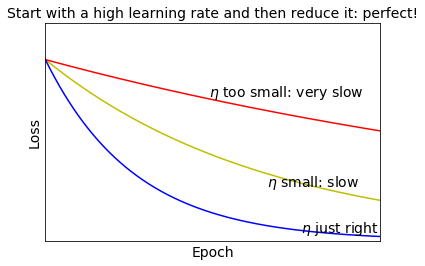

In [79]:
lx = np.linspace(0, 50, 1000)
plt.plot(lx,np.exp(-0.06*lx),'y-')
plt.plot(lx,np.exp(-0.02*lx),'r-')
plt.plot(lx,(np.exp(-0.15*lx)),'b-')
plt.axis([0, 25, 0, 1.2])
plt.xticks([])
plt.yticks([])
plt.annotate(r'$\eta$ just right', xytext=(22, 0.05), xy=(0, 0.5), fontsize=14, ha="center")
plt.annotate(r'$\eta$ small: slow', xytext=(20, 0.3), xy=(0, 0.5), fontsize=14, ha="center")
plt.annotate(r'$\eta$ too small: very slow', xytext=(18, 0.8), xy=(0, 0.5), fontsize=14, ha="center")
plt.title("Start with a high learning rate and then reduce it: perfect!", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.show()

1. Setting high learning rate, training may diverge and may never reach optimum.
2. Setting low learning rate, training will eventually converge to optimum but may take very long time.
3. Setting little high learning rate, training may intially quickly progress towards optimum but will take longer time to converge to optimum as it will bounce around optimum. Adaptive learning optimization algorithm can be used.
<br /> There are different ways to find near optimal learning rate. Two common ways are: <br /> I. Running with differnt constant learning rate several times during just a few epochs and then comparing their learning curves. <br /> II. Start with higher learning rate and then reduce it once it stops making progress. There are mutiple stratergies for this. The most common ones are: <br /> **Read pages 303 and 304**